In [2]:
import kaggle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import zipfile

# EDA

In [3]:
# Download and extract the Kaggle's Dataset
!kaggle datasets download -d abhishekrp1517/online-retail-transactions-dataset
z_file = 'online-retail-transactions-dataset.zip'
with zipfile.ZipFile(z_file, 'r') as file:
    file.extractall()

Dataset URL: https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset
License(s): copyright-authors
online-retail-transactions-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Load data
df = pd.read_csv('Online Retail.csv')

# View data structure
df.shape

(541909, 8)

In [5]:
# View first rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [6]:
# Convert column names into snake_case using Inflection
import inflection
snake_case_columns = [inflection.underscore(col) for col in df.columns]
df.columns = snake_case_columns

# Check the changes
print(df.columns)

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')


In [9]:
# Fill null values in 'description' column and delete null records on 'customer_id'
df.isnull().sum()
df = df.fillna({'description': 'NO DESCRIPTION'})
print(df.isnull().sum())
df = df.dropna(subset=['customer_id'])

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64


In [10]:
# Convert 'invoice_date' to a date format and delete duplicates
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df.drop_duplicates(inplace=True)
df.shape

(536641, 8)

In [11]:
# Creat a new column: 'total_sales'
df['total_sales'] = df['quantity'] * df['unit_price']
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [12]:
# Group and visualize total sales by country
df.groupby('country')['total_sales'].sum().reset_index()

,country,total_sales
0,Australia,137009.770
1,Austria,10154.320
2,Bahrain,548.400
3,Belgium,40910.960
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20076.390
7,Cyprus,12858.760
8,Czech Republic,707.720
9,Denmark,18768.140


# Visualization

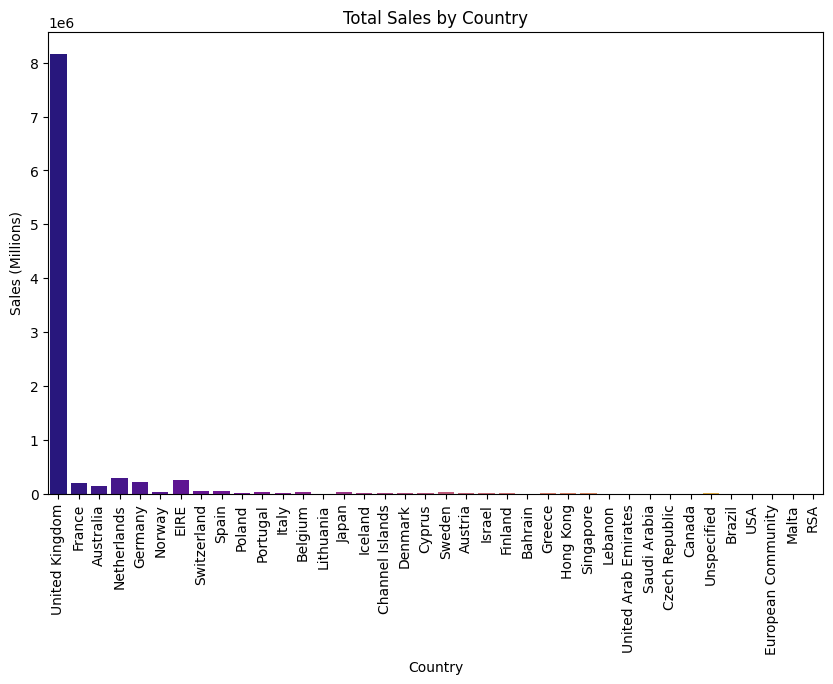

In [13]:
# Plotting the table of total sales by country
plt.figure(figsize=(10,6))
sns.barplot(x='country', y='total_sales', data=df, errorbar=None, palette='plasma', hue='country', dodge=None, estimator=sum)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=90)
plt.show()

C:\Users\MiPC\AppData\Local\Temp\ipykernel_1832\1730789184.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis', dodge=None)


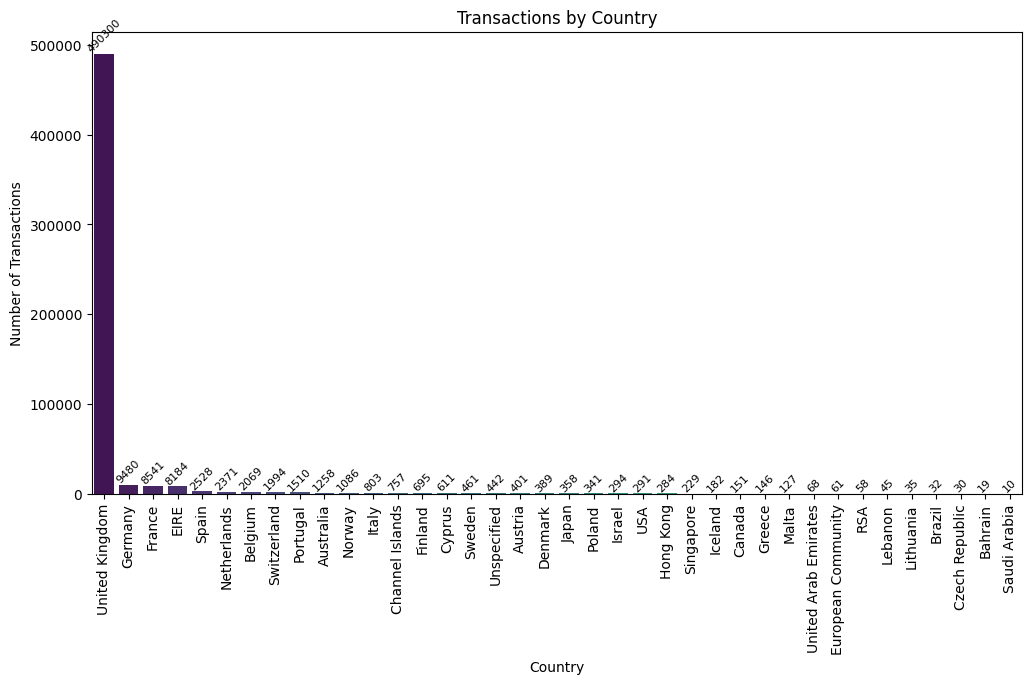

In [14]:
# Count and visualize transactions by country
country_counts = df['country'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis', dodge=None)
for p in ax.patches:
    height = p.get_height()
    if height > 1:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', rotation=45, fontsize=8)

plt.title('Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


Since UK representents 84% of the total sales, this project will be focusing on that country, considering the following reasons

1. Maximizing Impact:
Greater Return Potential: Focusing on the largest market ensures a higher potential for growth and return on investment.
Resource Efficiency: Concentrating efforts on a single market allows for resource optimization and achieving faster, tangible results.
2. Efficiency and Understanding:
Simplifying Strategy: Concentrating on a single market simplifies marketing strategy, customer segmentation, and operational management.
Better Market Understanding: In-depth knowledge of a specific market enables more effective product offerings and communication.
3. Leveraging Competitive Advantage:
Market Domination: Having a strong presence in the UK can create a competitive advantage and solidify the company's position.
Enhanced Consumer Insight: A deep understanding of the British consumer facilitates the creation of products and services tailored to their needs.
4. Performance and Results:
Higher Likelihood of Success: Focusing on a market with a high sales percentage increases the likelihood of achieving positive results.

In [15]:
# Filter by UK
df = df[df['country'] == 'United Kingdom']

In [16]:
# Check and work with 'quantity' column to analize sales
df['quantity'].describe()

count    490300.000000
mean          8.668831
std         228.768014
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64

In [17]:
# Delete records with negative quantities
df = df[df['quantity'] > 0]

In [18]:
# Filter outliers in 'quantity' using IQR
Q1_quantity = df['quantity'].quantile(0.25)
Q3_quantity = df['quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity
df_no_outliers_quantity = df[(df['quantity'] > lower_bound_quantity) & (df['quantity'] < upper_bound_quantity)]

count    434906.000000
mean          4.494564
std           4.344417
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max          23.000000
Name: quantity, dtype: float64


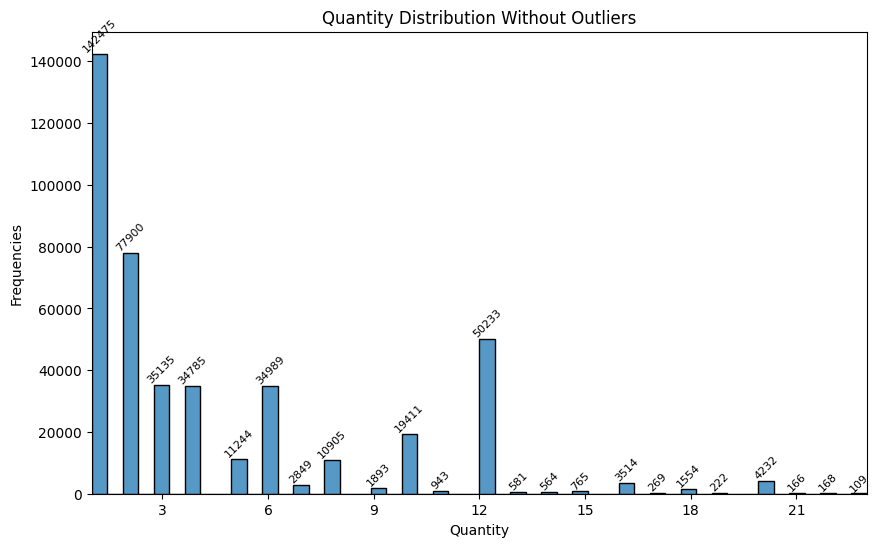

In [19]:
# Check 'quantity' distribution after filtering
print(df_no_outliers_quantity['quantity'].describe())
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_no_outliers_quantity['quantity'], bins=50)
ax.set_xlim(df_no_outliers_quantity['quantity'].min(), df_no_outliers_quantity['quantity'].max())
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
for p in ax.patches:
    height = p.get_height()
    if height > 1:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', rotation=45, fontsize=8)

plt.title('Quantity Distribution Without Outliers')
plt.xlabel('Quantity')
plt.ylabel('Frequencies')
plt.show()

In [20]:
# Check and work with 'unit_price' column
df_no_outliers_quantity['unit_price'].describe()

count    434906.000000
mean          4.077514
std          43.617891
min      -11062.060000
25%           1.250000
50%           2.460000
75%           4.150000
max       13541.330000
Name: unit_price, dtype: float64

In [21]:
# Delete records with negative prices
df_no_outliers_quantity = df_no_outliers_quantity[df_no_outliers_quantity['unit_price'] > 0]

In [22]:
# Filter outliers in 'unit_price' column
Q1_price = df_no_outliers_quantity['unit_price'].quantile(0.25)
Q3_price = df_no_outliers_quantity['unit_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
df_no_outliers = df_no_outliers_quantity[(df_no_outliers_quantity['unit_price'] > lower_bound_price) & (df_no_outliers_quantity['unit_price'] < upper_bound_price)]

In [23]:
# Check 'unit_price' column
print(df_no_outliers['unit_price'].describe())

count    401525.000000
mean          2.722778
std           1.952623
min           0.001000
25%           1.250000
50%           2.100000
75%           3.750000
max           8.490000
Name: unit_price, dtype: float64


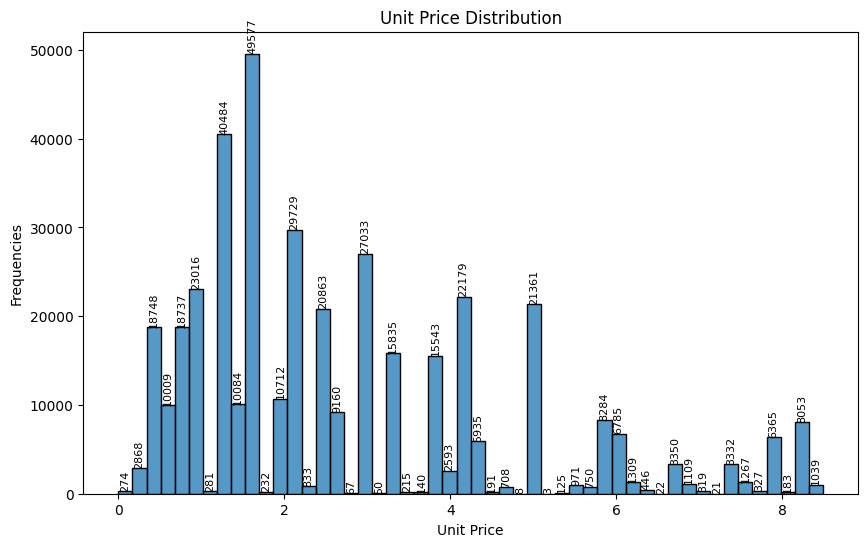

In [24]:
# View the 'unit_price' distribution after filtering
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_no_outliers['unit_price'], bins=50)
for p in ax.patches:
    height = p.get_height()
    if height > 1:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', rotation=90, fontsize=8)

plt.title('Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequencies')
plt.show()

In [73]:
corr_matrix = df_no_outliers.corr(numeric_only=True)
print(corr_matrix)

             quantity  unit_price  customer_id  total_sales   cluster
quantity     1.000000   -0.345169    -0.052860     0.641722  0.151683
unit_price  -0.345169    1.000000    -0.032415     0.279994  0.700693
customer_id -0.052860   -0.032415     1.000000    -0.063462 -0.052201
total_sales  0.641722    0.279994    -0.063462     1.000000  0.474763
cluster      0.151683    0.700693    -0.052201     0.474763  1.000000


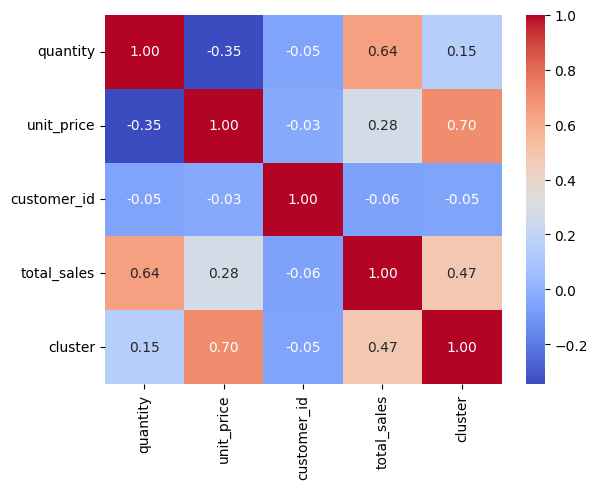

In [74]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

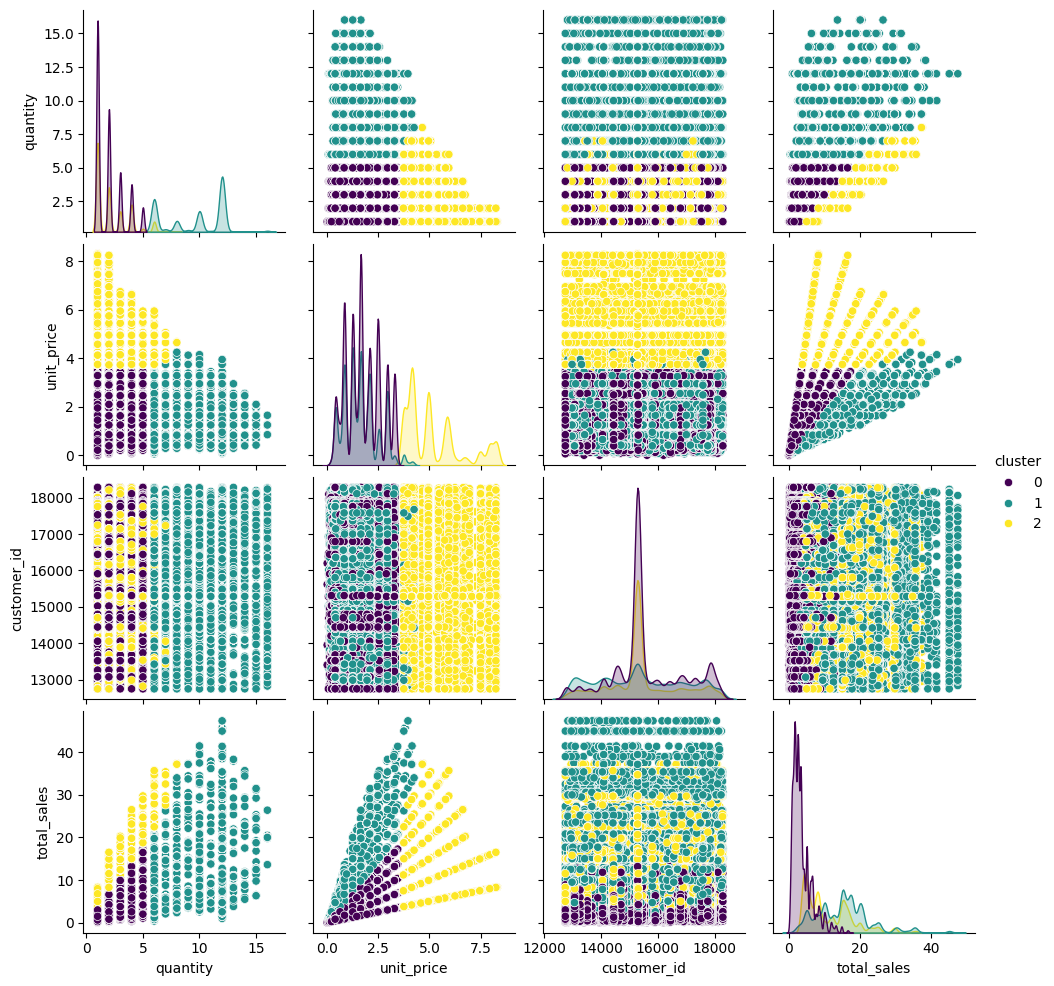

In [72]:
# Pair plot to see relations between features
sns.pairplot(df_no_outliers, hue='cluster', palette='viridis')
plt.show()

# Clustering and Segmentation

In [25]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_no_outliers[['quantity', 'unit_price']])

In [26]:
# Apply Isolation Forest to detect outliers
from sklearn.ensemble import IsolationForest
contamination_values = [0.01, 0.02, 0.05, 0.1]
results = {}

for cont in contamination_values:
    iso = IsolationForest(contamination=cont, random_state=42)
    outliers = iso.fit_predict(scaled_features)
    df_temp = df_no_outliers.copy()
    df_temp['outlier'] = outliers
    inliers = df_temp[df_temp['outlier'] == 1]
    results[cont] = inliers.shape[0]

# Show results for diferent values of 'contamination'
print("Results for different values of 'contamination':")
for cont, count in results.items():
    print(f"Contamination {cont}: {count} records")

Results for different values of 'contamination':
Contamination 0.01: 398002 records
Contamination 0.02: 393646 records
Contamination 0.05: 381462 records
Contamination 0.1: 361508 records


By removing the outliers and focusing on the country with 84% of the sales, the goal from the beginning of this project is to standardize the segmentation to provide a common customer analysis to the stakeholders. Therefore, a balance is sought between outlier removal and data retention, hence a contamination value of 0.05 is a good choice. This is because a value of 0.05 represents a good compromise, eliminating a reasonable amount of outliers (almost 20,000 records less than with 0.01), while still retaining the majority of the data.

In [27]:
# Select optimal value of 'contamination' and aplicate Isolation Forest
optimal_contamination = 0.05
iso = IsolationForest(contamination=optimal_contamination, random_state=42)
outliers = iso.fit_predict(scaled_features)
df_no_outliers['outlier'] = outliers
df_no_outliers = df_no_outliers[df_no_outliers['outlier'] == 1].copy()
df_no_outliers.drop(columns=['outlier'], inplace=True)

# Check the size of df after deleting outliers
print(df_no_outliers.shape)

(381462, 9)


C:\Users\MiPC\AppData\Local\Temp\ipykernel_1832\2615397453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['outlier'] = outliers


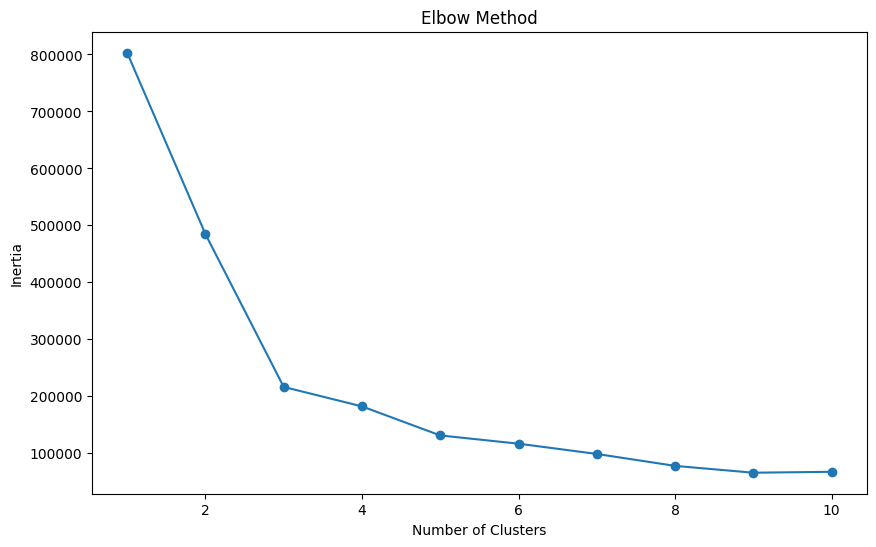

In [28]:
# Elbow method to select the optimal numbre of clusters
from sklearn.cluster import KMeans
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The elbow inflection occurs at number 3, indicating that it is the optimal number of clusters.

In [29]:
# Select relevant features and scale again
features_filtered = df_no_outliers[['quantity', 'unit_price']]
scaled_features_filtered = scaler.fit_transform(features_filtered)

# Apply K-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features_filtered)

# Add clusters to DataFrame using .loc to avoid SettingWithCopyWarning
df_no_outliers['cluster'] = kmeans.labels_

# Check assigned clusters
print(df_no_outliers['cluster'].value_counts())

cluster
0    172423
1    110609
2     98430
Name: count, dtype: int64


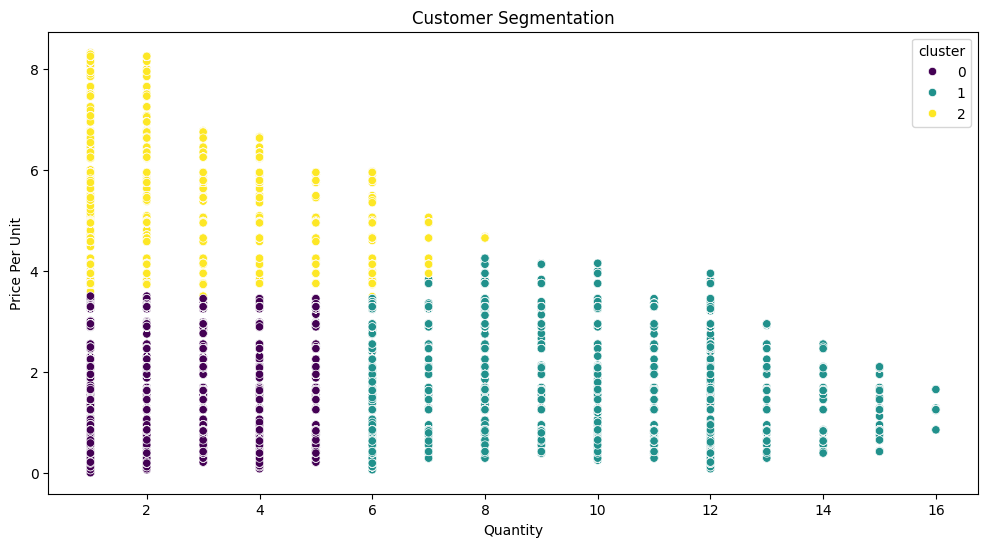

In [30]:
# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='quantity', y='unit_price', hue='cluster', data=df_no_outliers, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Quantity')
plt.ylabel('Price Per Unit')
plt.show()

The customer type in cluster 0 is the one closest to the origin, meaning their buying behavior tends to involve purchasing few products, typically at a lower price point offered by the company. Cluster 0 is the furthest from the origin, indicating customers who tend to make purchases in a mid-high quantity range with a mid-low price range. Finally, cluster 2 is located at the top of the graph, suggesting a customer type that buys more expensive products in smaller quantities.

In [31]:
# Show examples of each cluster
for cluster in df_no_outliers['cluster'].unique():
    print(f"\nCluster {cluster} examples:")
    print(df_no_outliers[df_no_outliers['cluster'] == cluster].head())


Cluster 1 examples:
  invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id         country  total_sales  \
0 2010-12-01 08:26:00        2.55        17850  United Kingdom        15.30   
1 2010-12-01 08:26:00        3.39        17850  United Kingdom        20.34   
2 2010-12-01 08:26:00        2.75        17850  United Kingdom        22.00   
3 2010-12-01 08:26:00        3.39        17850  United Kingdom        20.34   
4 2010-12-01 08:26:00        3.39        17850  United Kingdom        20.34   

   cluster  
0        1  
1        1  
2        1  
3      

In [32]:
# Take a sample of 20% from DataFrame for a quick silhouette analysis 
df_sample = df_no_outliers.sample(frac=0.2, random_state=42)
scaled_features_sample = scaler.fit_transform(df_sample[['quantity', 'unit_price']])

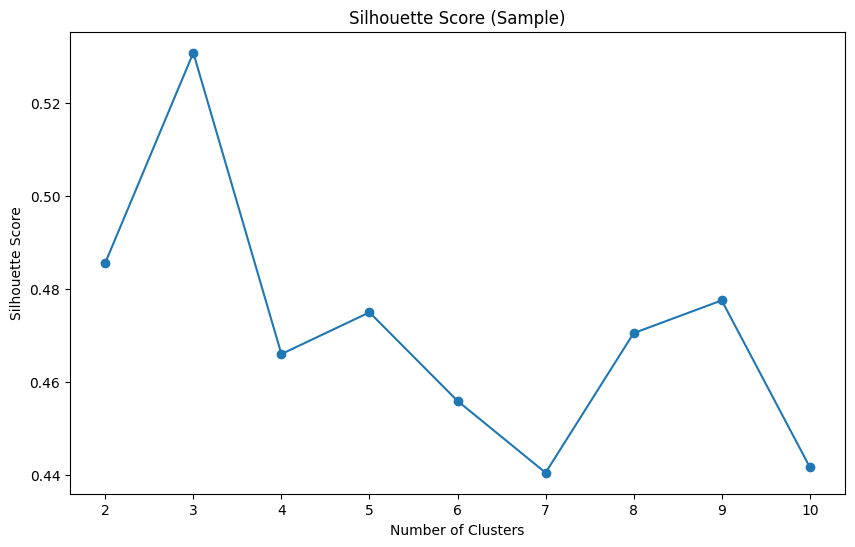

In [33]:
# Calculat silhouette score
from sklearn.metrics import silhouette_score

silhouette_scores_sample = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    clusters = kmeans.fit_predict(scaled_features_sample)
    silhouette_avg = silhouette_score(scaled_features_sample, clusters)
    silhouette_scores_sample.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_sample, marker='o')
plt.title('Silhouette Score (Sample)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

The silhouette score indicates that the highest value is for a number of clusters equal to 3, which is consistent with the previously applied elbow method, and therefore the clusters were chosen correctly for segmentation.

In [35]:
# Validate silhouette score
from sklearn.metrics import silhouette_score

# Create a subset of data for a quick test
subset = scaled_features_filtered[:100000]
cluster_subset = df_no_outliers['cluster'][:100000]

silhouette_avg_subset = silhouette_score(subset, cluster_subset)
print(f"Silhouette score for the subset: {silhouette_avg_subset:.2f}")

Silhouette score for the subset: 0.50


The points obtained of 0.50 match those indicated in the silhouette graph. Since the rating is moderate, there could be room for improvement, so we will explore scaling the data and adjusting the k-means model to recheck the silhouette score and thus confirm or dismiss the initial hypothesis of model improvement.

In [36]:
# Inicialize scaler
scaler = StandardScaler()

# Aplicate scale to relevant columns
df_scaled = df_no_outliers.copy()
df_scaled[['quantity', 'unit_price']] = scaler.fit_transform(df_no_outliers[['quantity', 'unit_price']])

# Verify first values
print(df_scaled[['quantity', 'unit_price']].head())

   quantity  unit_price
0  0.437866   -0.043609
1  0.437866    0.412364
2  0.953111    0.064956
3  0.437866    0.412364
4  0.437866    0.412364


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Inicialize K-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Adjust the model to scaled data
df_scaled['cluster'] = kmeans.fit_predict(df_scaled[['quantity', 'unit_price']])

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled[['quantity', 'unit_price']], df_scaled['cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.51


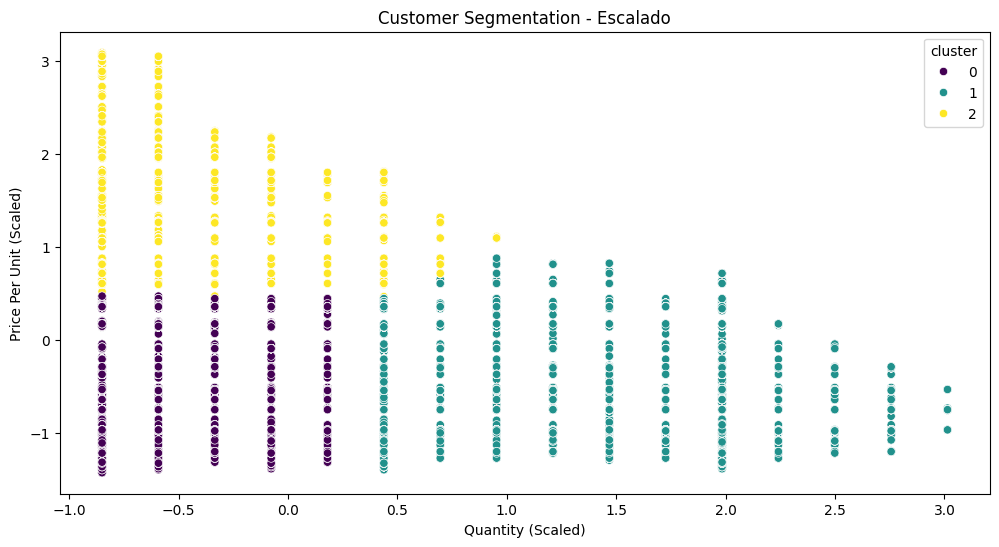

In [38]:
# Visualize clusters with scaled data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='quantity', y='unit_price', hue='cluster', data=df_scaled, palette='viridis')
plt.title('Customer Segmentation - Escalado')
plt.xlabel('Quantity (Scaled)')
plt.ylabel('Price Per Unit (Scaled)')
plt.show()

Since no significant improvement is shown, then another clustering method will be tried, with PCA being the selected one.

In [39]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 component
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled[['quantity', 'unit_price']])

# Convert PCA result in a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# Adjust K-means to reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df_pca['cluster'] = kmeans_pca.fit_predict(df_pca)

# Calculate silhouette score for data with PCA
silhouette_avg_pca = silhouette_score(df_pca[['PCA1', 'PCA2']], df_pca['cluster'])
print(f"Silhouette Score after PCA: {silhouette_avg_pca:.2f}")


Silhouette Score after PCA: 0.51


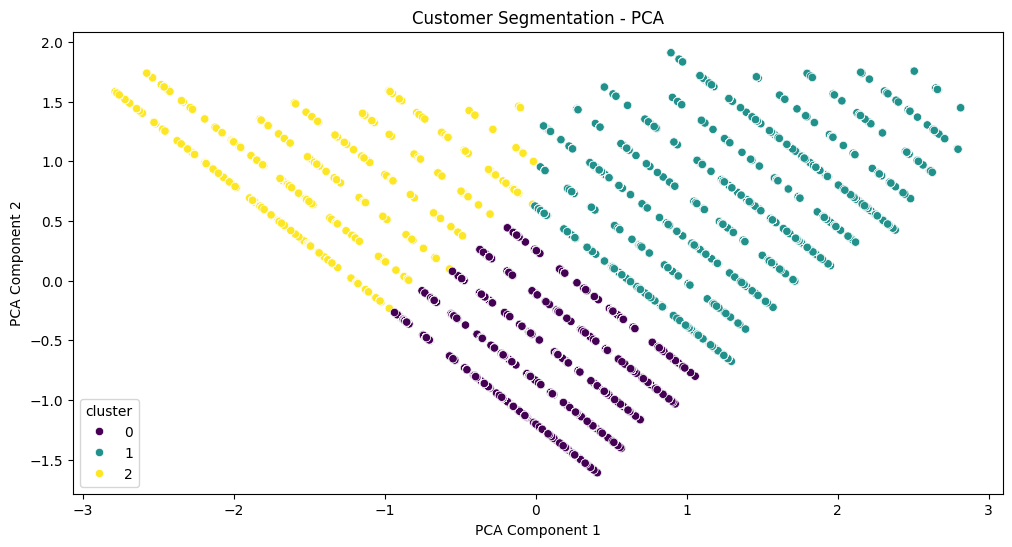

In [40]:
# Visualize clusters after PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='viridis')
plt.title('Customer Segmentation - PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

The distribution in the form of an inverted triangle and the low amount of overlap are positive indicators that the clusters are well differentiated. However, to confirm the quality of these clusters and better understand the characteristics of each group, DBSCAN will be applied next.

In [41]:
# Take a sample of 25%
df_sample = df_no_outliers.sample(frac=0.25, random_state=42)
print(f"Sample Size: {df_sample.shape}")

Sample Size: (95366, 10)


In [42]:
# Make the scale to quantity and unit_price
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample[['quantity', 'unit_price']])

In [43]:
from sklearn.cluster import DBSCAN

# Adjust parameters eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df_sample['dbscan_cluster'] = clusters_dbscan

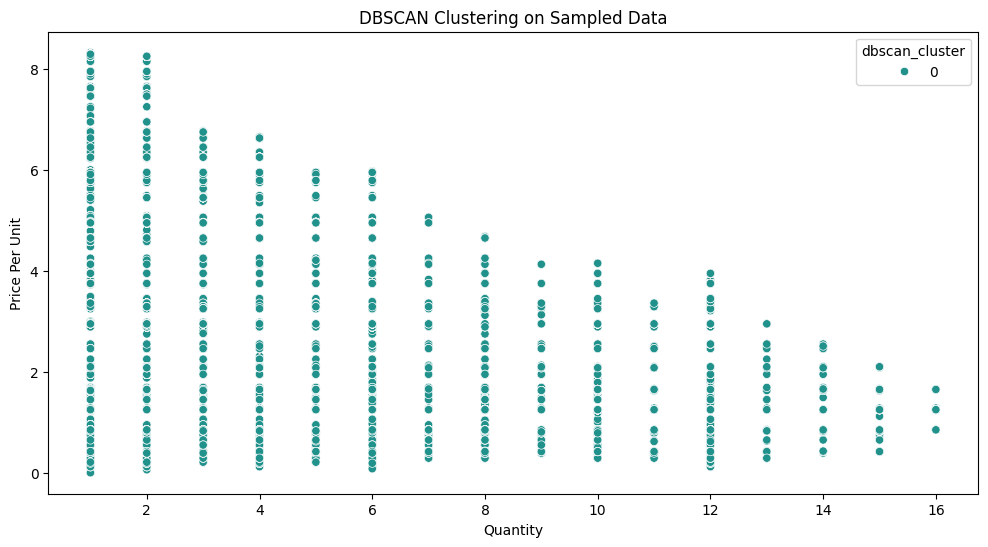

In [44]:
# Plot of clusters with DBSCAN
plt.figure(figsize=(12, 6))
sns.scatterplot(x='quantity', y='unit_price', hue='dbscan_cluster', data=df_sample, palette='viridis')
plt.title('DBSCAN Clustering on Sampled Data')
plt.xlabel('Quantity')
plt.ylabel('Price Per Unit')
plt.show()

The cluster coincides with that of k-means, indicating that the groups are well-defined and maintain their consistency regardless of the clustering method applied to them.

In [45]:
# Descriptive statistics by clúster
for cluster in df_no_outliers['cluster'].unique():
    print(f"\nCluster {cluster} features:")
    print(df_no_outliers[df_no_outliers['cluster'] == cluster].describe())


Cluster 1 features:
            quantity                   invoice_date     unit_price  \
count  110609.000000                         110609  110609.000000   
mean        9.694293  2011-07-06 03:08:39.122132992       1.654201   
min         6.000000            2010-12-01 08:26:00       0.060000   
25%         6.000000            2011-04-04 09:55:00       0.850000   
50%        10.000000            2011-07-22 09:20:00       1.650000   
75%        12.000000            2011-10-14 11:42:00       2.100000   
max        16.000000            2011-12-09 12:49:00       4.250000   
std         2.602285                            NaN       0.842609   

         customer_id    total_sales   cluster  
count  110609.000000  110609.000000  110609.0  
mean    15392.038071      15.249847       1.0  
min     12747.000000       0.360000       1.0  
25%     14112.000000       9.960000       1.0  
50%     15287.000000      15.000000       1.0  
75%     16700.000000      19.500000       1.0  
max     1828

In [46]:
# Group by cluster and calculate the sum of total_sales
sales_summary = df_no_outliers.groupby('cluster')['total_sales'].sum().reset_index()

# Rename columns for major clarity
sales_summary.columns = ['Cluster', 'Total Sales']

print(sales_summary)

   Cluster  Total Sales
0        0   606126.434
1        1  1686770.310
2        2  1080424.720


In [67]:
# Calculate Client Life Value
df_clv = df_no_outliers.groupby(['cluster', 'customer_id'])['total_sales'].sum().reset_index()
clv = df_clv.groupby('cluster')['total_sales'].mean()

print("Client Life Value by Cluster:")
print(clv)

Client Life Value by Cluster:
cluster
0    308.147653
1    469.590844
2    326.116728
Name: total_sales, dtype: float64


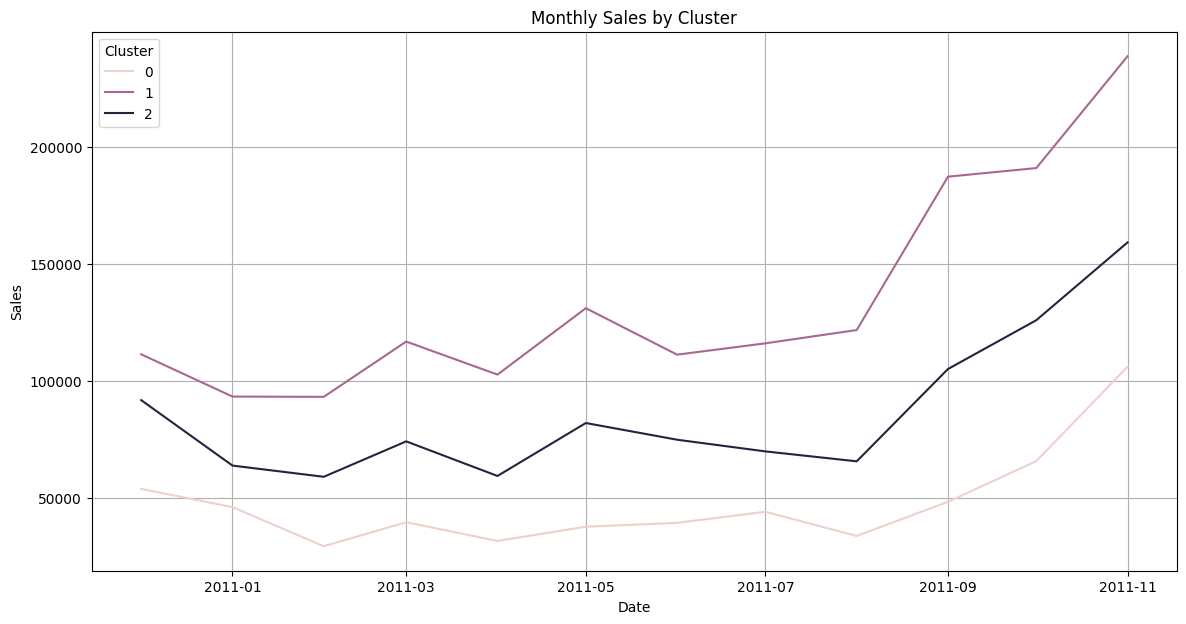

In [75]:
# Group by cluster, date (month) and sum total_sales
df_grouped = df_no_outliers.groupby(['cluster', df_no_outliers['invoice_date'].dt.to_period('M')])['total_sales'].sum().reset_index()
df_grouped['invoice_date'] = df_grouped['invoice_date'].dt.to_timestamp()

# Filter data untill 2011-11
df_grouped = df_grouped[df_grouped['invoice_date'] <= '2011-11-01']

# Visualize la seasonality and trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_grouped, x='invoice_date', y='total_sales', hue='cluster')
plt.title('Monthly Sales by Cluster')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Forecast with ARIMA

In [ ]:
# Adjust configuration of Pandas to show numbers and dec format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

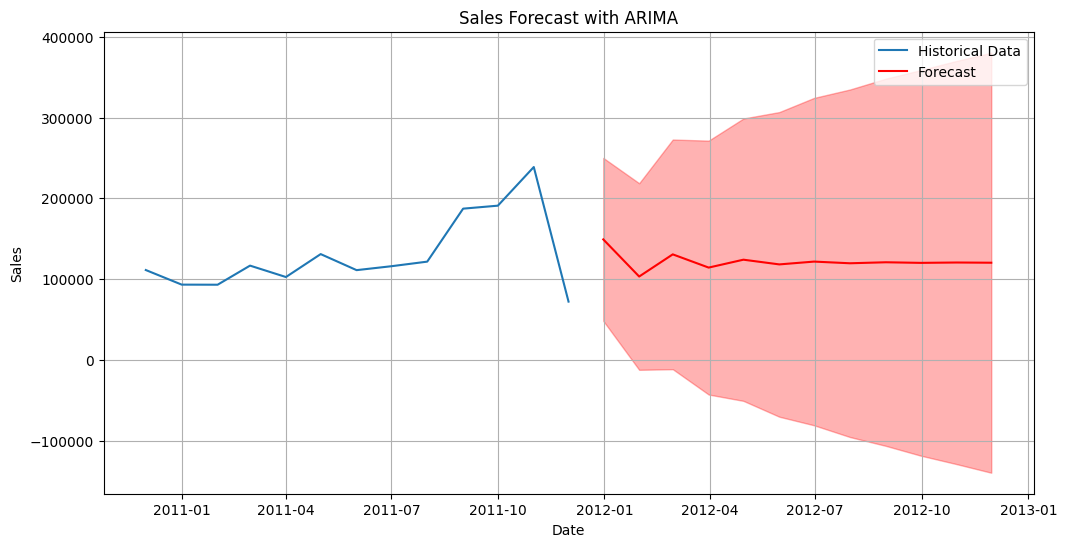

In [164]:
from statsmodels.tsa.arima.model import ARIMA

# Filter data for cluster 1
df_cluster = df_no_outliers[df_no_outliers['cluster'] == 1]

# Group by moth and sum total_sales
df_cluster_grouped = df_cluster.groupby(df_cluster['invoice_date'].dt.to_period('M')).agg({'total_sales': 'sum'}).reset_index()
df_cluster_grouped['invoice_date'] = df_cluster_grouped['invoice_date'].dt.to_timestamp()

# Renae columns for ARIMA
df_cluster_grouped = df_cluster_grouped.rename(columns={'invoice_date': 'ds', 'total_sales': 'y'})
df_cluster_grouped.set_index('ds', inplace=True)

# Adjust ARIMA
model = ARIMA(df_cluster_grouped['y'], order=(1, 1, 1))
model_fit = model.fit()

# Create a DataFrame for future dates
future_dates = pd.date_range(start='2011-12-01', periods=12, freq='M')
forecast = model_fit.get_forecast(steps=len(future_dates))
forecast_df = forecast.summary_frame()
forecast_df.index = future_dates
forecast_df = forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']].rename(columns={'mean': 'yhat', 'mean_ci_lower': 'yhat_lower', 'mean_ci_upper': 'yhat_upper'})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_cluster_grouped.index, df_cluster_grouped['y'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['yhat'], label='Forecast', color='r')
plt.fill_between(forecast_df.index, forecast_df['yhat_lower'], forecast_df['yhat_upper'], color='r', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast with ARIMA')
plt.legend()
plt.grid(True)
plt.show()

In [165]:
# Show forecasts
print(forecast_df)

y               yhat  yhat_lower  yhat_upper
2011-12-31 149265.86    48462.27   250069.44
2012-01-31 103328.18   -12089.48   218745.85
2012-02-29 130740.51   -11318.00   272799.01
2012-03-31 114382.79   -42658.67   271424.25
2012-04-30 124143.91   -50503.62   298791.44
2012-05-31 118319.17   -70120.04   306758.38
2012-06-30 121794.96   -80703.92   324293.83
2012-07-31 119720.86   -95239.11   334680.82
2012-08-31 120958.53  -106163.72   348080.78
2012-09-30 120219.97  -118226.31   358666.26
2012-10-31 120660.69  -128720.64   370042.02
2012-11-30 120397.70  -139387.29   380182.69


# Customer Segmentation Report

## Cluster Summary

Objective: Analyze the distribution and behavior of customers segmented into three clusters to better understand their characteristics and economic contributions.

### Cluster 0: Low-Value Customers

- Cluster Size: 172,423 customers (45% of total)

- Buying Behavior: Customers in this cluster, on average, purchase 2 products per transaction. The average cost per unit is $1.77.

- Contribution to Total Sales: This cluster represents $606,126.43 in total sales (18% of the total). Despite its considerable size, the low value of products purchased and the reduced number of items per transaction result in a lower economic contribution compared to other clusters.

### Cluster 1: High-Value Customers

- Cluster Size: 110,609 customers (29% of total)

- Buying Behavior: Customers in this cluster purchase an average of 9.70 products per transaction, with an average cost of $1.65 per unit.

- Contribution to Total Sales: This cluster contributes $1,686,770.31 (50% of the total) and has the highest CLV. Despite being smaller in size compared to cluster 0, the average number of products purchased and moderate prices significantly contribute to total sales.

### Cluster 2: High-Value Customers with Lower Frequency

- Cluster Size: 98,430 customers (26% of total)

- Buying Behavior: Customers in this cluster purchase, on average, 3 products per transaction, with an average cost of $5.23 per unit. This is the highest cost among the clusters.

- Contribution to Total Sales: This cluster represents $1,080,424.72 (32% of the total). Although smaller in size and with lower contribution than cluster 1, the higher cost per product places it second in total sales contribution.

## Conclusions

- Economic Contribution: Despite cluster 0 having the highest number of customers, their low purchase value results in the lowest contribution to total sales. In contrast, cluster 1, although the second largest, has the greatest impact on total sales due to the significant quantity of products purchased and moderate prices. Cluster 2, although smaller compared to others, has a high purchase value per customer, positioning it as the second in economic contribution.

- Recommended Strategies:
    - For Cluster 0: Consider strategies to increase the value of purchases, such as promotions or cross-selling.
    - For Cluster 1: Continue strategies that encourage frequent purchases and consider adjustments in prices or promotions to maintain high contribution.
    - For Cluster 2: Foster customer loyalty with exclusive offers, given their high purchase value per transaction